# Data analysis of the points along with the years

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('players_stats_by_season_full_details.csv')
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,...,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,...,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,...,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,...,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,...,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [29]:
db = df[df['League'] == 'NBA']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36950 entries, 0 to 36949
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       36950 non-null  object 
 1   Season       36950 non-null  object 
 2   Stage        36950 non-null  object 
 3   Player       36950 non-null  object 
 4   Team         36950 non-null  object 
 5   GP           36950 non-null  int64  
 6   MIN          36950 non-null  float64
 7   FGM          36950 non-null  int64  
 8   FGA          36950 non-null  int64  
 9   3PM          36950 non-null  int64  
 10  3PA          36950 non-null  int64  
 11  FTM          36950 non-null  int64  
 12  FTA          36950 non-null  int64  
 13  TOV          36950 non-null  int64  
 14  PF           36950 non-null  int64  
 15  ORB          36950 non-null  int64  
 16  DRB          36950 non-null  int64  
 17  REB          36950 non-null  int64  
 18  AST          36950 non-null  int64  
 19  STL 

### First all, to compare all the variables with the points on the graphic, we must get the max value on the dataframe of 'db' with the sum of all the points of the dataframe. Getting the sums, we could create an array with all the values from season 2009 to 2019.

In [21]:
arr_pts_seasons=[]
for i in db['Season'].unique():
    arr_pts_seasons.append(db[db['Season'] == i]['PTS'].sum())
df1 = pd.DataFrame({'Season_Year':db['Season'].unique(), 'Total_Points': arr_pts_seasons})
df1

,Season_Year,Total_Points
0,2009 - 2010,203083
1,2010 - 2011,193550
2,2011 - 2012,161018
3,2012 - 2013,200446
4,2013 - 2014,203969
5,2014 - 2015,185465
6,2015 - 2016,188246
7,2016 - 2017,242838
8,2017 - 2018,237757
9,2018 - 2019,253551


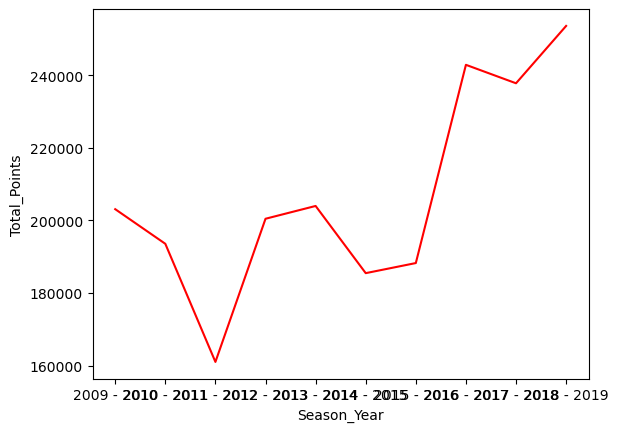

In [22]:
plt.plot(df1['Season_Year'], df1['Total_Points'], 'r')
plt.xlabel('Season_Year')
plt.ylabel('Total_Points')
plt.show()

### The rise of the number of total points increased by the time, getting the max value on the last year. So, in order to further understand the data, let us analyze the top scores of the maximum and the minimum total_points of the given year.

In [25]:
## min total points
db[db['Season'] == '2011 - 2012'][['PTS', 'Player']].nlargest(n = 5, columns = 'PTS')

,PTS,Player
402,1850,Kevin Durant
403,1683,LeBron James
404,1616,Kobe Bryant
405,1558,Russell Westbrook
406,1432,Kevin Love


In [26]:
## max total points
db[db['Season'] == '2018 - 2019'][['PTS', 'Player']].nlargest(n = 5, columns = 'PTS')

,PTS,Player
2034,2818,James Harden
2035,2159,Paul George
2036,2102,Kemba Walker
2037,2099,Bradley Beal
2038,2067,Damian Lillard


### As we can see, all of the players of the season  2018-2019 defeat the players of 2011-2012. Seeing through some media, they shared that this happens due to the change of how players got used to 3-Pointers. We could check that, adding more one attribute to the min and max values.

In [27]:
## min value observation: it doesn't feel the need to satisfy both points and 3-pointer made condiction, it only implies the value
## of the top scorer, just showing his 3 points made, doesn't mean he is the one that has made more 3 points
db[db['Season'] == '2011 - 2012'][['PTS', 'Player', '3PM']].nlargest(n = 5, columns = 'PTS')

,PTS,Player,3PM
402,1850,Kevin Durant,133
403,1683,LeBron James,54
404,1616,Kobe Bryant,87
405,1558,Russell Westbrook,62
406,1432,Kevin Love,105


In [28]:
## max value
db[db['Season'] == '2018 - 2019'][['PTS', 'Player', '3PM']].nlargest(n = 5, columns = 'PTS')

,PTS,Player,3PM
2034,2818,James Harden,378
2035,2159,Paul George,292
2036,2102,Kemba Walker,260
2037,2099,Bradley Beal,209
2038,2067,Damian Lillard,237


### To ensure our theory, we could check it by a density diagram, of each point representating the 3-points attempted by a given season year. 

<Figure size 10000x10000 with 0 Axes>

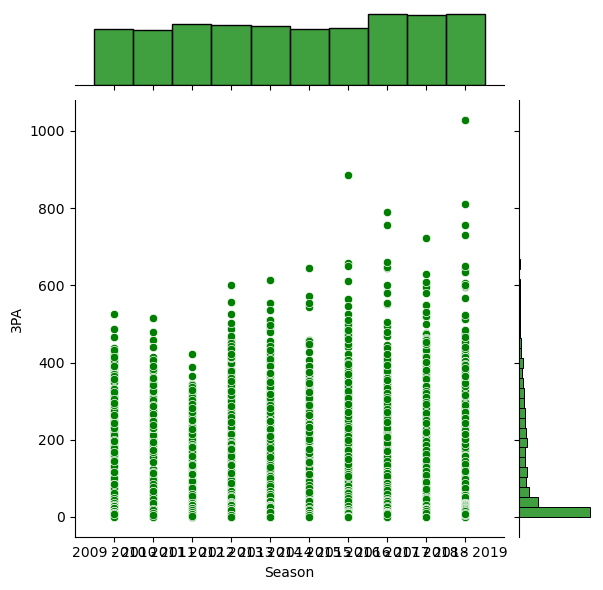

In [38]:
plt.figure(figsize=(100,100))
sns.jointplot(data=db, x = 'Season', y= '3PA', color = 'green')

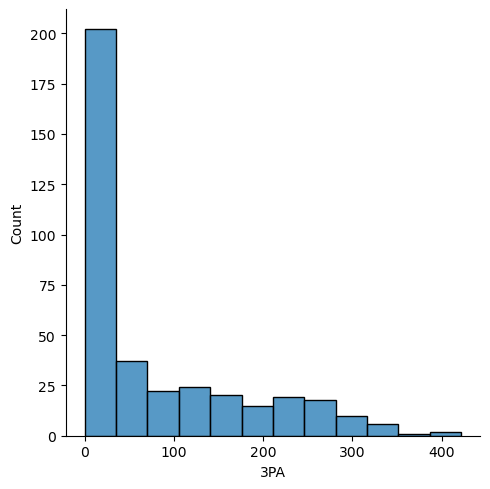

In [40]:
sns.displot(x = db[db['Season'] == '2011 - 2012']['3PA'])

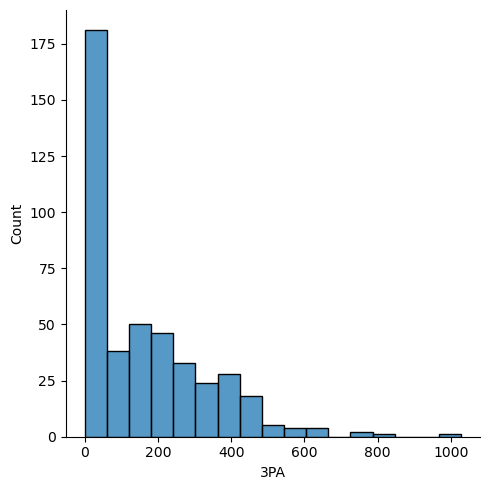

In [41]:
sns.displot(x = db[db['Season'] == '2018 - 2019']['3PA'])

In [50]:
## we can see that the correlation of 3-point making increases with the decrease of the weight. so, for example:
## there's a higher rate for a person with 80kg to score a 3 pointer than another with 100kg
db['weight_kg'].corr(db['3PM'])

-0.2933745171237272

In [52]:
db.keys()

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

In [93]:
## let's create two dataframes, getting the correlations of each value for db of season 2011-2012, and 2018-2019, with number
##of points.
arr_to_corr1 = []
arr_to_corr2 = []
for i in range(17):
    arr_to_corr1.append(db[db['Season'] == '2011 - 2012'][db.keys()[i+5]].corr(db['PTS']))
for j in range(17):
    arr_to_corr2.append(db[db['Season'] == '2018 - 2019'][db.keys()[j+5]].corr(db['PTS']))
arr_to_corr1
arr_to_corr2
ds_keys = pd.Series(db.keys()[5:22])
ds1 = pd.Series(arr_to_corr1)
ds2 = pd.Series(arr_to_corr2)
df3 = pd.DataFrame([ds_keys, ds1, ds2])
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
1,0.740315,0.919918,0.992727,0.989662,0.566723,0.598481,0.927879,0.922814,0.888821,0.738071,0.545276,0.783847,0.736072,0.6839,0.802818,0.422966,1.0
2,0.734995,0.904491,0.992567,0.989514,0.750781,0.769337,0.917448,0.911269,0.914974,0.76417,0.519867,0.788933,0.743061,0.784834,0.780348,0.500209,1.0


### Now that we have the analysis of each element, taking a mean of both arrays, we'll get the highest correlation, and thefore, the highest probability of a highest number of points. To go even deeper, we could also take the standard deviation of each array, implying that the one with a smaller change of factors, has the highest mean.

In [95]:
np.mean(arr_to_corr1)

0.7800171355383109

In [96]:
np.mean(arr_to_corr2)

0.8098115496220821

In [97]:
np.std(arr_to_corr1)

0.1693121594595315

In [98]:
np.std(arr_to_corr2)

0.14201822470647343

#### This ends the data analysis for points, we found the different scenarios of why the Season 2018-2019 has the highest number of points, due to a change of how players play, attempting more than the double of tries for 3 points. Also, the influx of stats of 2018-2019 made it easier to achieve such a high number of points. 